# Pivoting

In [1]:
import pandas as pd

df = pd.DataFrame({'A': ['foo','foo','foo','foo','foo','bar','bar','bar','bar'],
                   'B': ['one','one','one','two','two','one','one','two','two'],
                   'C': ['small','large','large','small','small','large','small','small','large'],
                   'D': [1,2,2,3,3,4,5,6,7]})
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [2]:
import numpy as np
pivot_table = pd.pivot_table(df,values = 'D', index = ['A','B'], columns=['C'], aggfunc=np.sum)
pivot_table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [3]:
pivot_table = pd.pivot_table(df,values = 'D', index = ['A','B'], columns=['C'], aggfunc=np.mean)
pivot_table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    2.0    1.0
    two    NaN    3.0

In [6]:
pivot_table = pd.pivot_table(df,values = 'D', index = ['A','B'], columns=['C'], aggfunc=np.median)
pivot_table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    2.0    1.0
    two    NaN    3.0

# Binning
qcut() and cut()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
raw_df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=true')
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [7]:
raw_df['account number'].value_counts()

424914    107
218895     94
714466     94
412290     89
740150     82
729833     82
737550     81
146832     79
383080     74
688981     74
642753     73
672390     73
239344     72
786968     72
527099     71
257198     67
307599     64
141962     55
163416     53
604255     51
Name: account number, dtype: int64

In [13]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()
df.head()

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


In [31]:
df.shape

(20, 3)

<AxesSubplot:ylabel='Frequency'>

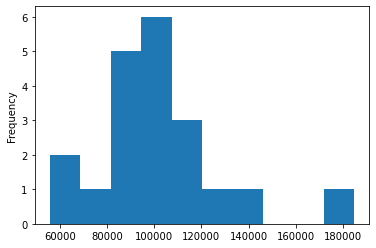

In [14]:
df['ext price'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

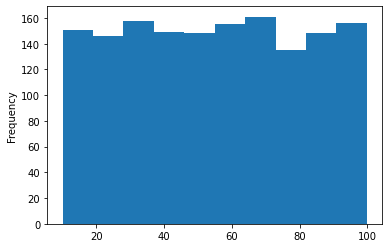

In [15]:
raw_df['unit price'].plot(kind='hist')

In [43]:
df['ext price'].describe()

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: ext price, dtype: float64

In [44]:
pd.qcut(df['ext price'], q=4)   
#Because we asked for quantiles with q=4 the bins match the percentiles from the describe function.
#1st quantile: min - 25%
#2nd quantile: 25% - 50%
#3rd quantile: 50% - 75%
#4th quantile: 75% - max

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 184793.7]]

In [45]:
#q=6, 6 quantiles
pd.qcut(df['ext price'], q=6)

0     (55733.049000000006, 86600.422]
1             (91241.493, 100271.535]
2     (55733.049000000006, 86600.422]
3              (112528.643, 184793.7]
4             (91241.493, 100271.535]
5              (86600.422, 91241.493]
6     (55733.049000000006, 86600.422]
7             (104178.58, 112528.643]
8              (112528.643, 184793.7]
9              (112528.643, 184793.7]
10            (91241.493, 100271.535]
11    (55733.049000000006, 86600.422]
12             (86600.422, 91241.493]
13             (86600.422, 91241.493]
14            (100271.535, 104178.58]
15             (112528.643, 184793.7]
16            (100271.535, 104178.58]
17            (104178.58, 112528.643]
18            (104178.58, 112528.643]
19            (100271.535, 104178.58]
Name: ext price, dtype: category
Categories (6, interval[float64]): [(55733.049000000006, 86600.422] < (86600.422, 91241.493] < (91241.493, 100271.535] < (100271.535, 104178.58] < (104178.58, 112528.643] < (112528.643, 184793.7]]

In [47]:
#50 quantiles
pd.qcut(df['ext price'], q=50)

0              (61731.715, 65624.135]
1              (99404.465, 99767.834]
2              (76470.992, 80293.011]
3            (135396.079, 148737.978]
4              (91465.258, 93139.073]
5              (89591.308, 90169.664]
6              (83543.098, 86486.914]
7             (104375.435, 105937.87]
8            (112576.361, 116260.013]
9              (166765.839, 184793.7]
10             (98677.239, 99105.864]
11    (55733.049000000006, 58732.382]
12             (87167.958, 87776.907]
13             (90686.361, 91129.611]
14           (100775.236, 101619.475]
15           (120360.194, 124778.438]
16            (103640.531, 103784.87]
17           (111714.992, 112290.054]
18           (107838.212, 109605.073]
19           (102620.886, 103571.409]
Name: ext price, dtype: category
Categories (50, interval[float64]): [(55733.049000000006, 58732.382] < (58732.382, 61731.715] < (61731.715, 65624.135] < (65624.135, 71047.564] ... (130087.258, 135396.079] < (135396.079, 148737.978] < (1487

In [48]:
#store quantiles in dataframe for future analysis
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)  #precision is to control the decimal

In [20]:
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [21]:
# how the values are distributed across the bins?
df['quantile_ex_1'].value_counts()

(110132.552, 184793.7]             5
(100271.535, 110132.552]           5
(89137.708, 100271.535]            5
(55733.049000000006, 89137.708]    5
Name: quantile_ex_1, dtype: int64

In [22]:
df['quantile_ex_2'].value_counts()

(124778.0, 184794.0]    2
(112290.0, 124778.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(76471.0, 87168.0]      2
(55732.0, 76471.0]      2
Name: quantile_ex_2, dtype: int64

In [50]:
#One of the challenges with this approach is that the bin labels are not very easy to explain to an end user.So , 
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],q=[0, .2, .4, .6, .8, 1],labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [51]:
df['quantile_ex_3'].value_counts()

#terciles: q=[0, 1/3, 2/3, 1] or q=3
#quintiles: q=[0, .2, .4, .6, .8, 1] or q=5
#sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6

Diamond     4
Platinum    4
Gold        4
Silver      4
Bronze      4
Name: quantile_ex_3, dtype: int64

In [54]:
results, bin_edges = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])
results_table

,Threshold,Tier
0,55733.050,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


In [55]:
df.describe(include='category')

,quantile_ex_1,quantile_ex_2,quantile_ex_3
count,20,20,20
unique,4,10,5
top,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
freq,5,2,4


In [57]:
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze,0
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold,2
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze,0
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver,1
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,"(89137.708, 100271.535]","(87168.0, 90686.0]",Silver,1
6,307599,"Kassulke, Ondricka and Metz",86451.07,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze,0
7,383080,Will LLC,104437.60,"(100271.535, 110132.552]","(103606.0, 105938.0]",Platinum,3
8,412290,Jerde-Hilpert,112591.43,"(110132.552, 184793.7]","(112290.0, 124778.0]",Diamond,4
9,424914,White-Trantow,184793.70,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond,4


# Methods to divide bins
1. Eqaul frequency binning
2. Equal width binning

In [24]:
#Equal frequency binning
#m = bins
def equifreq(arr1, m):
    a = len(arr1)  #len = 12
    n = int( a / m) # 12/3 = n= 4
    for i in range(0,m):  #(0,3)
        arr = []
        for j in range(i * n, (i + 1) * n): #(0,3)..(3,6)..(6,9)..(9,12)
            if j >= a:
                break
            arr = arr + [arr1[j]]
        print(arr)
        
ex = [5,10,11,13,15,35,50,55,72,92,204,215]
equifreq(ex,3)

[5, 10, 11, 13]
[15, 35, 50, 55]
[72, 92, 204, 215]


In [65]:
def equifreq(arr1, m):
    a = len(arr1)  #len = 12
    n = int( a / m) # 12/3 = n= 4
    for i in range(0,m):  #(0,3)
        arr = []
        for j in range(6,9): #(9,12)
            if j >= a:
                break
            arr = arr + [arr1[j]]
        print(arr)
        
ex = [5,10,11,13,15,35,50,55,72,92,204,215]
equifreq(ex,3)

[50, 55, 72]
[50, 55, 72]
[50, 55, 72]


In [59]:
len(ex)/3

4.0

In [25]:
#equal width binning

def equiwidth(arr1, m):
    
    a = len(arr1)
    w = int((max(arr1)- min(arr1)) / m)
    
    min1 = min(arr1)
    arr = []
    for i in range(0, m+1):
        arr = arr+ [min1 + w * i]
    arri = []
        
    for i in range(0, m):
        temp = []
        for j in arr1:
            if j >= arr[i] and j <= arr[i+1]:
                temp += [j]
        arri += [temp]
    print(arri)

equiwidth(ex,3)

[[5, 10, 11, 13, 15, 35, 50, 55, 72], [92], [204, 215]]


In [26]:
m = 3 
arr1 = [5,10,11,13,15,35,50,55,72,92,204,215]
a = len(arr1)
w = int((max(arr1)- min(arr1)) / m)
arr = []
min1 = min(arr1)
for i in range(0, m+1):
    arr = arr+ [min1 + w * i]
arri = []
arr

[5, 75, 145, 215]

# Assignment 1 pivoting

In [66]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [71]:
df = pd.read_csv('../Teacher Ferdin/fishdata.csv', encoding = 'unicode_escape',header = None)

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2020.0,6.0,18,14,30.0,33.0,qCBrs9ï¿½ ï¿½R! ï¿½ï¿½ï¿½ï¿½cï¿½ï¿½Fï¿½Initial...,NaN,NaN,NaN,NaN,NaN
1,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.0,27.19,4.39
2,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.0,27.19,4.38
3,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.0,27.19,4.38
4,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.0,27.19,4.41


In [74]:
column_names = ['Year','Month','Day','Hour','Minute','Second','Carbon_Monoxide','PM_2.5','External_Temperature','Humidity','Internal_Temperature',' ']
df.columns = column_names

In [108]:
df.drop(index = df.index[0], inplace = True)
df.head()

,Year,Month,Day,Hour,Minute,Second,Carbon_Monoxide,PM_2.5,External_Temperature,Humidity,Internal_Temperature,
4,2020.0,6.0,18,14,31.0,8.0,201.0,25.0,29.0,95.0,27.19,4.41
5,2020.0,6.0,18,14,31.0,13.0,201.0,25.0,29.0,95.0,27.25,4.41
6,2020.0,6.0,18,14,31.0,23.0,201.0,25.0,29.0,95.0,27.19,4.38
7,2020.0,6.0,18,14,31.0,28.0,201.0,25.0,29.0,95.0,27.19,4.38
8,2020.0,6.0,18,14,31.0,33.0,201.0,25.0,29.0,95.0,27.19,4.41


In [102]:
df.dtypes

Year                    float64
Month                   float64
Day                       int64
Hour                      int64
Minute                  float64
Second                  float64
Carbon_Monoxide          object
PM_2.5                  float64
External_Temperature    float64
Humidity                float64
Internal_Temperature    float64
                        float64
dtype: object

In [103]:
df1 = df.astype({'Year':'int64',
                'Month': 'int64',
                'Minute':'int64',
                'Second':'int64'})
df['Carbon_Monoxide'] = df['Carbon_Monoxide'].apply(pd.to_numeric, errors='coerce')

In [126]:
pivot_cols = ['Month','External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide']
pivot = df[pivot_cols]
pivot.head()

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide
4,6.0,29.0,27.19,95.0,201.0
5,6.0,29.0,27.25,95.0,201.0
6,6.0,29.0,27.19,95.0,201.0
7,6.0,29.0,27.19,95.0,201.0
8,6.0,29.0,27.19,95.0,201.0


In [127]:
pivot_table = pd.pivot_table(pivot,index = 'Month', 
                             values = ['External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide'], 
                             aggfunc=np.mean)
pivot_table.head()

,Carbon_Monoxide,External_Temperature,Humidity,Internal_Temperature
Month,,,,
-1912020.0,24.0,-183.0,30.0,95.0
-1172020.0,42.0,-30.0,31.0,95.0
-232020.0,0.0,-23.0,28.0,95.0
-202020.0,34.0,-63.0,31.0,95.0
-122020.0,58.0,-27.0,32.0,95.0


In [134]:
pivot.shape

(811943, 5)

In [136]:
from scipy import stats
z_scores = stats.zscore(pivot['Month'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 12)
new_df = pivot[filtered_entries]
new_df

,Month,External_Temperature,Internal_Temperature,Humidity,Carbon_Monoxide
4,6.0,29.0,27.19,95.00,201.0
5,6.0,29.0,27.25,95.00,201.0
6,6.0,29.0,27.19,95.00,201.0
7,6.0,29.0,27.19,95.00,201.0
8,6.0,29.0,27.19,95.00,201.0
...,...,...,...,...,...
811942,10.0,25.0,25.94,95.00,201.0
811943,10.0,25.0,25.94,95.00,201.0
811944,10.0,95.0,4.18,25.94,-168.0
811945,10.0,25.0,25.94,95.00,201.0


In [137]:
filtered_entries = (abs_z_scores >0)
new_df = pivot[filtered_entries]

In [138]:
new_df.shape

(811943, 5)

In [133]:
new_df['Month'].value_counts()

 7.0        392351
 6.0        164538
 8.0        118570
 9.0         93026
 10.0        43371
             ...  
-72020.0         1
-68.0            1
-127.0           1
-61.0            1
 2.0             1
Name: Month, Length: 72, dtype: int64

In [123]:
new_pivot_table = pd.pivot_table(new_df,index = 'Month', 
                             values = ['External_Temperature','Internal_Temperature','Humidity','Carbon_Monoxide'], 
                             aggfunc=np.mean)
new_pivot_table.head()

,Carbon_Monoxide,External_Temperature,Humidity,Internal_Temperature
Month,,,,
-22020.00000,7.0,-103.0,31.0,95.0
-2020.00000,31.2,-115.2,29.8,95.0
-204.00202,35.0,-149.0,28.0,95.0
-131.02020,25.0,-20.0,30.0,95.0
-120.20200,9.0,-88.0,32.0,95.0
